## Collection of terrible Graphs.
Graphs are plots of model based dyna implementation, without any annotations bedcause I am lazy.


In [1]:
import jax
import matplotlib.pyplot as plt

from dyna.training import make_dyna_train_fn 
from dyna.types import ActorCriticHyperParams, DynaHyperParams, TransitionModelHyperParams


In [2]:
c_hyp = ActorCriticHyperParams(NUM_EPOCHS=4, NUM_UPDATES=10)
m_hyp = TransitionModelHyperParams(NUM_EPOCHS=1,)
hyp = DynaHyperParams(NUM_ENVS=4, NUM_UPDATES=25, ac_hyp=c_hyp, USE_MODEL=True)
free_hyp = DynaHyperParams(NUM_ENVS=4, NUM_UPDATES=25, ac_hyp=c_hyp, USE_MODEL=False)

dyna_train_fn = jax.vmap(make_dyna_train_fn(hyp))
free_dyna_train_fn = jax.vmap(make_dyna_train_fn(free_hyp))
rng = jax.random.PRNGKey(42)
rng = jax.random.split(rng, 32)
results = dyna_train_fn(rng)
free_results = free_dyna_train_fn(rng)



In [3]:
result_train_state , loss_info = results
mf_loss, mf_traj, p_loss, p_traj, m_loss = loss_info

free_r_t_s , loss_info = free_results
f_mf_l, f_mf_t, _, _, _= loss_info

Text(0, 0.5, 'Episodic Return')

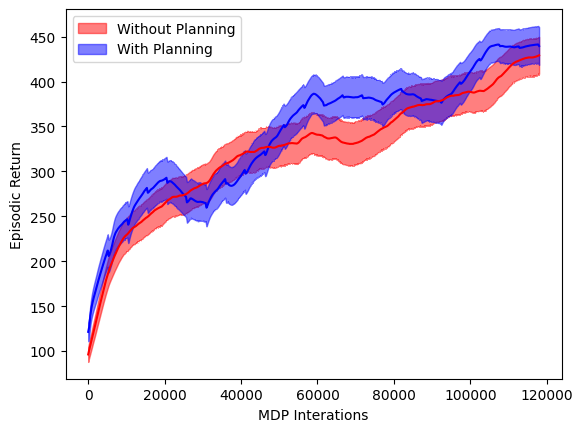

In [13]:
import numpy as np
import jax.numpy as jnp
def moving_average(x, w=10000):
    return np.convolve(x, np.ones(w), "valid") / w

acting_returns = mf_traj.info["returned_episode_returns"]
acting_returns_mean = jnp.mean(acting_returns, axis=0).reshape(-1)
acting_returns_std = jnp.std(acting_returns, axis=0).reshape(-1)/ np.sqrt(32)
acting_returns_mean = moving_average(acting_returns_mean)
acting_returns_std = moving_average(acting_returns_std)
lower = acting_returns_mean - acting_returns_std
upper = acting_returns_mean + acting_returns_std

model_f_returns = f_mf_t.info["returned_episode_returns"]
f_returns_mean = jnp.mean(model_f_returns, axis=0).reshape(-1)
f_returns_std = jnp.std(model_f_returns, axis=0).reshape(-1)/ np.sqrt(32)
f_returns_mean = moving_average(f_returns_mean)
f_returns_std = moving_average(f_returns_std)
f_lower = f_returns_mean - f_returns_std
f_upper = f_returns_mean + f_returns_std




plt.plot(acting_returns_mean, color="blue")
plt.plot(f_returns_mean, color="red")
plt.fill_between(jnp.arange(len(acting_returns_mean)), f_lower, f_upper, alpha=0.5, color="red", label="Without Planning")
plt.fill_between(jnp.arange(len(acting_returns_mean)), lower, upper, alpha=0.5, color="blue", label="With Planning")
plt.legend()
plt.xlabel("MDP Interations")
plt.ylabel("Episodic Return")




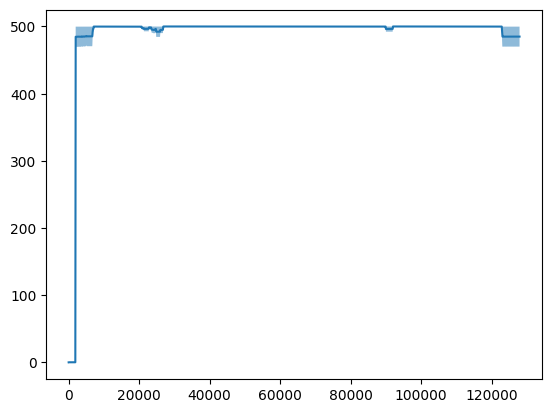

In [5]:
acting_returns = p_traj.info["returned_episode_returns"]
acting_returns_mean = jnp.mean(acting_returns, axis=0).reshape(-1)
acting_returns_std = jnp.std(acting_returns, axis=0).reshape(-1)
acting_returns_mean = moving_average(acting_returns_mean, w=100)
acting_returns_std = moving_average(acting_returns_std, w=100)/ np.sqrt(32)
lower = acting_returns_mean - acting_returns_std
upper = acting_returns_mean + acting_returns_std

plt.plot(acting_returns_mean)
plt.fill_between(jnp.arange(len(acting_returns_mean)), lower, upper, alpha=0.5)

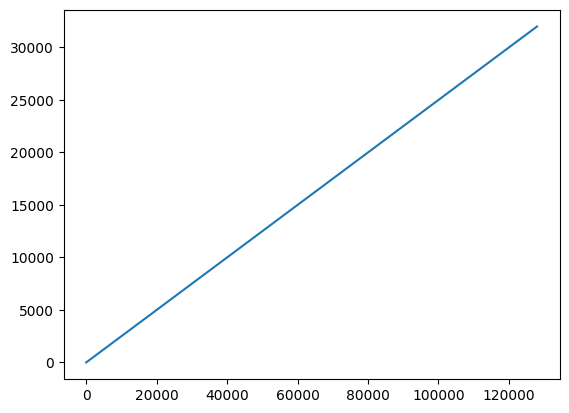

In [6]:
tstp = mf_traj.info["timestep"].mean(axis=0).reshape(-1)
plt.plot(tstp)

In [7]:
mf_info = mf_traj.info
mf_info.keys()

dict_keys(['discount', 'returned_episode', 'returned_episode_lengths', 'returned_episode_returns', 'timestep'])

Text(0.5, 1.0, 'Acting Returns')

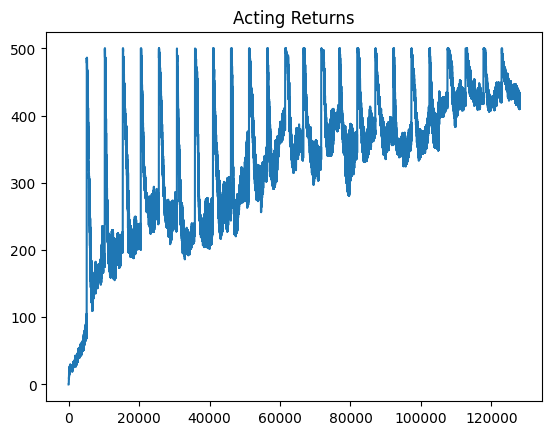

In [8]:
plt.plot(mf_info["returned_episode_returns"].mean(axis=0).reshape(-1))
plt.title("Acting Returns")
# plt.plot(p_traj.info["returned_episode_returns"].mean(axis=-1).reshape(-1))

Text(0.5, 1.0, 'Acting Policy Loss')

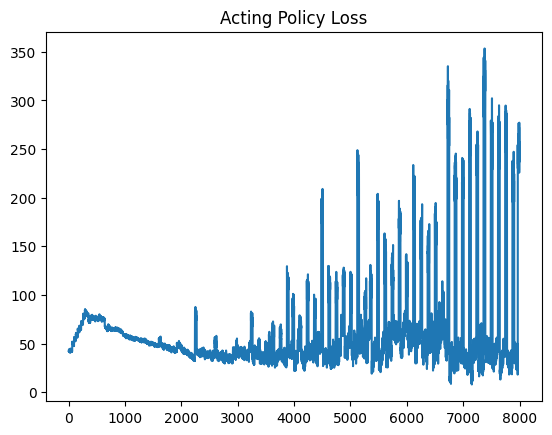

In [9]:
plt.plot(mf_loss[1][0].mean(axis=0).reshape(-1))
plt.title("Acting Policy Loss")

Text(0.5, 1.0, 'Planning Policy Loss')

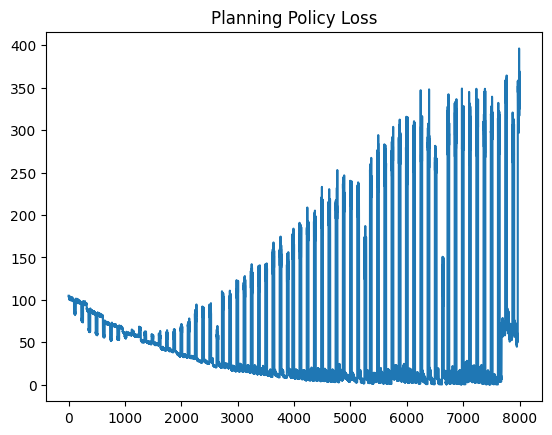

In [10]:
plt.plot(p_loss[1][0].mean(axis=0).reshape(-1))
plt.title("Planning Policy Loss")

(32, 25, 10, 8)


Text(0.5, 1.0, 'Transition Model Loss')

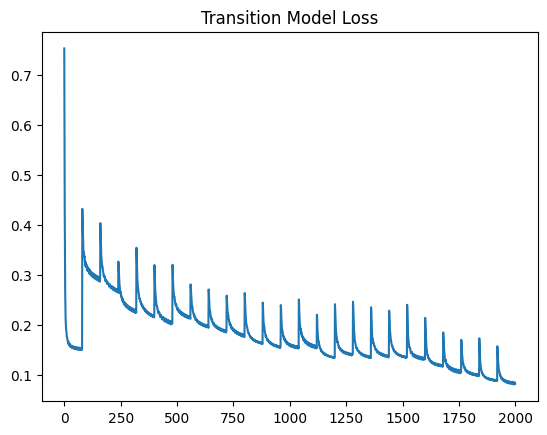

In [11]:
print(m_loss.shape)
plt.plot(m_loss.mean(axis=0).reshape(-1))

plt.title("Transition Model Loss")